# **Song Preference Predictor**

### Spring 2025 Data Science Project

Atharv Umap, Saxon Wolcott, Vrishin Patel

### **Contributions:**

A: Project idea
- Atharv: Generated the idea and outline of implementing a song recommendation model. Located the data set, added the necessary labels, and created the final product goal (In future steps, formatted and labeled the analysis occuring at each step based on the plan created). 

B: Dataset Curation and Preprocessing
- Saxon: Cleaned the data by removing null entries in track name, artist name, and milliseconds played. Also filled all null entries in the genre column to unknown (these can be removed for the analysis that require specific genre). Further preprocessing for the specific statistical tests and analysis in Part C.
- Vrishin: Performed Preprocessing for the statistical tests mentioned in part C.

C: Data Exploration and Summary Statistics
- Saxon: 
    - Most Popular genre based on listening time (included making categories for the genre) - ANOVA Test
        - Visualizations: Box Plot and Pie Chart
    - Mean Listening time per Genre (Line Chart)
    - Distribution of Song Play Duration
- Vrishin:
    - Energy Level for Dance Pop vs. Album Rock (T-test)
    - Danceability vs. Valence (Correlation)
    - Genre vs Play Level (Chi-squared Test)

D: ML Algorithm Design/Development
- Atharv: Performed the necessary feature engineering for model training. This included performing...
    - standardization
    - one-hot encoding (of genre column)
    - Principal Component Analysis to attain the best components and reduce dimensionality.

E: ML Algorithm Training and Test Data Analysis
- Atharv: 
    - After performing the feature engineering, trained four different models.
        - K-Nearest Neighbors
        - Decision Tree
        - Random Forest
        - Logistic Regression.
    - Also implemented a stratified K-fold cross validation to allow for model analysis both during and after training the model. 

F: Visualization, Result Analysis, Conclusion
- Atharv: Created an elbow plot (and cumulative sum table) for the Principal Componenet Analysis number of components to choose the number of features for model training
- Vrishin: Box Plot Vizualization of the means and standard deviations of the Cross-validation accuracy to compare the performance of the four models during the training phase (using a validation set).

G: Final Tutorial Report Creation
- Collective: We all equally divided formatting, writing up analysis, and ensuring the flow of our project is optimal.

### **Introduction**

For our project, we implemented a complete data science pipeline to develop a personalized song recommendation system, similar to the one used by Spotify. Our system took a user's expressed preferences—likes and dislikes—across a curated set of songs and used that data to train a machine learning model tailored to the individual's musical tastes. The trained model was then applied to a broader selection of songs to generate personalized recommendations.

This system can be useful in two key ways: generating a playlist of generally liked songs and creating thematic playlists. For thematic playlists, users can modify input data to select songs they wanted to include by marking them as "liked" and exclude others by marking them as "disliked." Based on this input, the model returns song suggestions that align with the playlist. Our project also allows for users to get quick access to a range of new songs because once the model is trained they can run the recommendation multiple times to get many lists of song recommendations (and songs to avoid as a bonus).


### **Data Curation and Exploratory Data Analysis**

Dataset: https://www.kaggle.com/datasets/byomokeshsenapati/spotify-song-attributes

Why this dataset?
This dataset gives us various information about songs: genre, danceability, energy, key, loudness, modality, and ‘speechiness’. These features of the song are useful because their values will be correlated with the likes and dislikes data to decide what values of these features fit.

**Note:** that we added our one classification for each song based on some of the songs we like/dislike/don't know, so we can test the models and make prediction.

Following this is our code to both transform our data and perform Exploratory Data Analysis


In [1]:
#Initializng the necessary imports for data manipulaiton
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing the database
df = pd.read_csv("Spotify_Song_Attributes_Labeled.csv")
# display(df)

We want to start by cleaning the data based on null values.

In [3]:
# Cleaning the data based on null values
df = df.dropna(subset=['trackName', 'artistName', 'msPlayed'])  # Drop rows without basic info
df = df.dropna(thresh=df.shape[1]-3)  # Keep only rows with less than 3 null values
df['genre'] = df['genre'].fillna('unknown') # Fill missing genres with 'unknown'
display(df)

,trackName,artistName,msPlayed,genre,danceability,energy,key,loudness,mode,speechiness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,user_label
0,"""Honest""",Nico Collins,191772,unknown,0.476,0.799,4.0,-4.939,0.0,0.2120,...,0.577,162.139,audio_features,7dTxqsaFGHOXwtzHINjfHv,spotify:track:7dTxqsaFGHOXwtzHINjfHv,https://api.spotify.com/v1/tracks/7dTxqsaFGHOX...,https://api.spotify.com/v1/audio-analysis/7dTx...,191948.0,4.0,0
1,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,1806234,british orchestra,0.475,0.130,7.0,-17.719,1.0,0.0510,...,0.122,112.241,audio_features,14Qcrx6Dfjvcj0H8oV8oUW,spotify:track:14Qcrx6Dfjvcj0H8oV8oUW,https://api.spotify.com/v1/tracks/14Qcrx6Dfjvc...,https://api.spotify.com/v1/audio-analysis/14Qc...,150827.0,4.0,0
2,#BrooklynBloodPop!,SyKo,145610,glitchcore,0.691,0.814,1.0,-3.788,0.0,0.1170,...,0.509,132.012,audio_features,7K9Z3yFNNLv5kwTjQYGjnu,spotify:track:7K9Z3yFNNLv5kwTjQYGjnu,https://api.spotify.com/v1/tracks/7K9Z3yFNNLv5...,https://api.spotify.com/v1/audio-analysis/7K9Z...,145611.0,4.0,0
3,$10,Good Morning,25058,experimental pop,0.624,0.596,4.0,-9.804,1.0,0.0314,...,0.896,120.969,audio_features,3koAwrM1RO0TGMeQJ3qt9J,spotify:track:3koAwrM1RO0TGMeQJ3qt9J,https://api.spotify.com/v1/tracks/3koAwrM1RO0T...,https://api.spotify.com/v1/audio-analysis/3koA...,89509.0,4.0,0
4,(I Just) Died In Your Arms,Cutting Crew,5504949,album rock,0.625,0.726,11.0,-11.402,0.0,0.0444,...,0.507,124.945,audio_features,4ByEFOBuLXpCqvO1kw8Wdm,spotify:track:4ByEFOBuLXpCqvO1kw8Wdm,https://api.spotify.com/v1/tracks/4ByEFOBuLXpC...,https://api.spotify.com/v1/audio-analysis/4ByE...,280400.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074,Younger,Ruel,5272303,alt z,0.745,0.477,11.0,-7.706,0.0,0.0880,...,0.454,136.055,audio_features,2qXicQG06oT0ijKBznpgQv,spotify:track:2qXicQG06oT0ijKBznpgQv,https://api.spotify.com/v1/tracks/2qXicQG06oT0...,https://api.spotify.com/v1/audio-analysis/2qXi...,222320.0,4.0,0
10075,Younger with Time.,Ben Zaidi,668478,folk-pop,0.537,0.143,2.0,-16.992,1.0,0.0331,...,0.245,131.118,audio_features,6o8pM5reLgjd5i8gDY3Irt,spotify:track:6o8pM5reLgjd5i8gDY3Irt,https://api.spotify.com/v1/tracks/6o8pM5reLgjd...,https://api.spotify.com/v1/audio-analysis/6o8p...,222827.0,3.0,0
10077,Your Love Is My Drug (8 Bit Slowed),just valery,97600,sad lo-fi,0.282,0.158,6.0,-7.783,1.0,0.0311,...,0.248,65.152,audio_features,1EoThnDm6kQfB2idIfR30n,spotify:track:1EoThnDm6kQfB2idIfR30n,https://api.spotify.com/v1/tracks/1EoThnDm6kQf...,https://api.spotify.com/v1/audio-analysis/1EoT...,112582.0,4.0,0
10078,Your Power,Billie Eilish,988224,art pop,0.632,0.284,9.0,-14.025,0.0,0.0801,...,0.208,129.642,audio_features,042Sl6Mn83JHyLEqdK7uI0,spotify:track:042Sl6Mn83JHyLEqdK7uI0,https://api.spotify.com/v1/tracks/042Sl6Mn83JH...,https://api.spotify.com/v1/audio-analysis/042S...,245897.0,4.0,0


**First exploration:** Which genres are most popular?

(Our definition of popularity is which genres have the most total minutes played)

In [4]:
df_genre = df[df['genre'] != 'unknown'] # Dropping rows with unknown genres
df = df_genre[df_genre['msPlayed'] > 0]  # Drop rows with non-positive msPlayed values
df_genre = df

# In order to narrow down the number of genres, we will use keywords to group them together
# Define genre mapping dictionary
genre_keywords = {
    'alternative': ['alt', 'alternative'],
    'pop': ['pop'],
    'rap': ['rap'],
    'edm': ['edm', 'electronic', 'dance'],
    'indie': ['indie'],
    'rock': ['rock'],
    'anime': ['anime'],
    'hip hop': ['hip hop', 'hip-hop'],
    'metal': ['metal'],
    'country': ['country'],
    'r&b': ['r&b', 'rnb', 'soul'],
    'jazz': ['jazz'],
    'lo-fi': ['lo-fi', 'lofi'],
    'classical': ['classic', 'classical'],
    'soundtrack': ['soundtrack', 'ost', 'video game'],
    'singer-songwriter': ['singer-songwriter', 'acoustic']
}

# Function to map genres based on keywords
def map_genre(genre_string):
    genre_lower = genre_string.lower()
    for main_genre, keywords in genre_keywords.items():
        if any(keyword in genre_lower for keyword in keywords):
            return main_genre
    return 'other'

# Apply the mapping to the genre column
df_genre['mapped_genre'] = df_genre['genre'].apply(map_genre)

df_genre_grouped = df_genre.groupby('mapped_genre')['msPlayed'].sum().reset_index() # Group by genre and sum msPlayed values
df_genre_grouped = df_genre_grouped.sort_values(by='msPlayed', ascending=False) # Sort by msPlayed in descending order
df_genre_grouped['hrsPlayed'] = df_genre_grouped['msPlayed'] / 3600000 # Convert msPlayed to hours
df_genre_grouped['hrsPlayed'] = df_genre_grouped['hrsPlayed'].round(2) # Round to 2 decimal places
df_genre_grouped = df_genre_grouped.drop(columns=['msPlayed']) # Drop the msPlayed column
df_genre_grouped = df_genre_grouped.rename(columns={'mapped_genre': 'genre'}) # Rename the column to 'genre'
df_genre_grouped = df_genre_grouped.reset_index(drop=True) # Reset the index
display(df_genre_grouped) # Display the final DataFrame with genre and hours played



,genre,hrsPlayed
0,pop,1498.65
1,alternative,530.26
2,other,453.20
3,indie,188.13
4,hip hop,148.67
5,rap,136.89
6,edm,123.21
7,singer-songwriter,115.84
8,lo-fi,90.91
9,anime,90.24


Now that we have a DataFrame that displays the most popular genres, we can use that to make a graph that shows how they compare to one another. The best graph for this situation would be a bar chart.

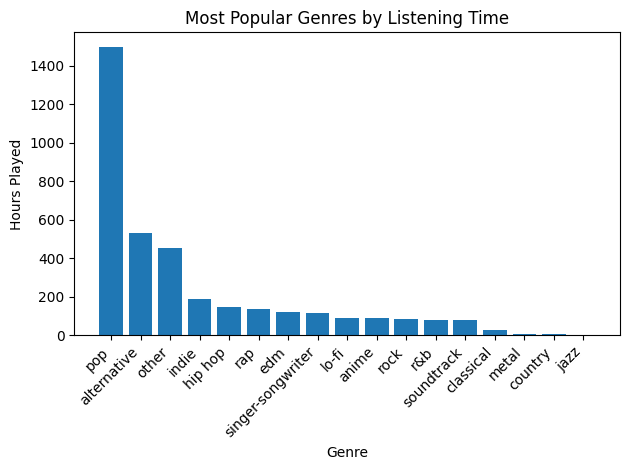

In [5]:

# Make the plot
plt.bar(df_genre_grouped['genre'], df_genre_grouped['hrsPlayed'])

# Customize the plot
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.xlabel('Genre')
plt.ylabel('Hours Played')
plt.title('Most Popular Genres by Listening Time')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

We can see that the 'pop' category is represented much more than the others, lets explore that by breaking down the 'pop' category into sub-categories.

In this next block the data is filtered to only include genres with the word 'pop' in the name. Then the most represented pop genres (genres with 25 entries or more) are shown by popularity in terms of time played on a pie chart.

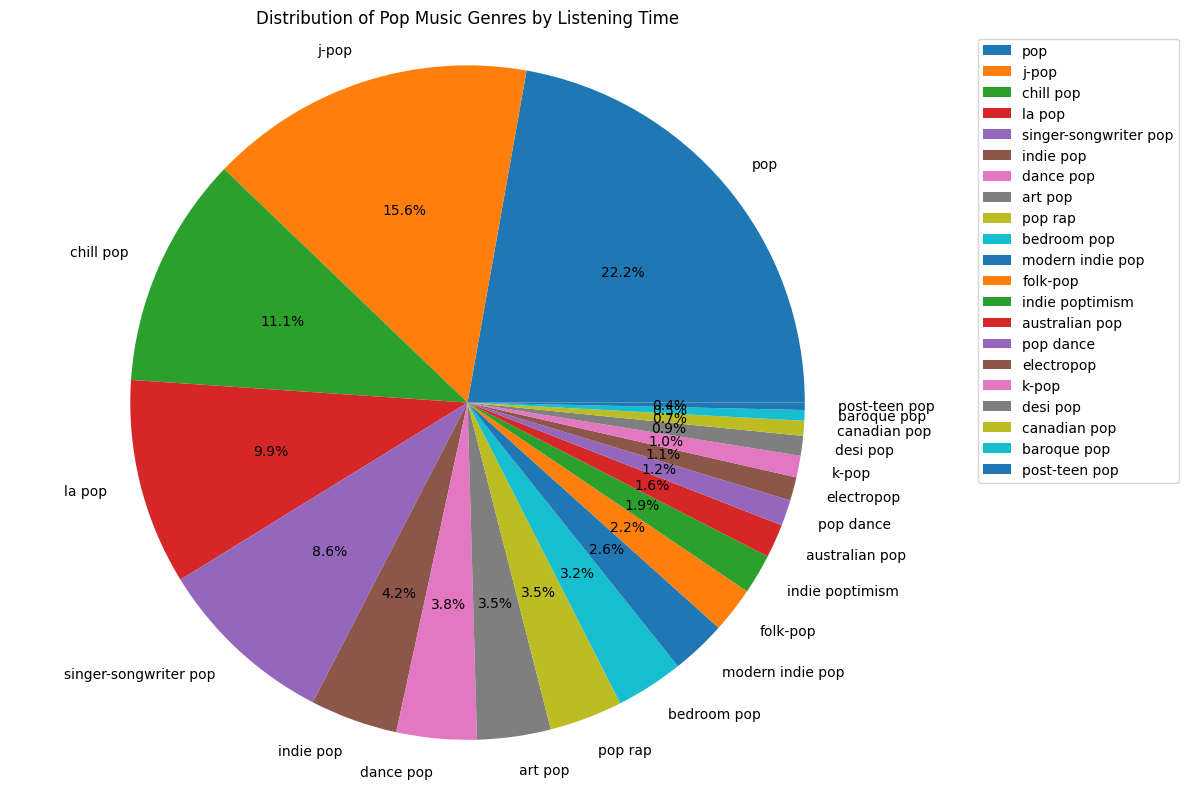

In [6]:
# Function to check if the genrename contains 'pop'
def pop_only(genre_string):
    genre_lower = genre_string.lower()
    if 'pop' in genre_lower:
        return True
    return False

# Apply the function to the genre column
df_pop = df.copy()

df_pop['pop_only'] = df_pop['genre'].apply(pop_only)

# Filter the DataFrame to include only pop songs
df_pop = df_pop[df_pop['pop_only'] == True]

# Group by genre and count entries
genre_counts = df_pop.groupby('genre').size()

# Get genres with 25 or more entries
popular_genres = genre_counts[genre_counts >= 25].index

# Filter df_pop to only include these genres
df_pop = df_pop[df_pop['genre'].isin(popular_genres)]

# Drop the temporary pop_only column
df_pop = df_pop.drop('pop_only', axis=1)

# Display the DataFrame with only pop songs
# Group by genre and calculate total hours played
df_pop_grouped = df_pop.groupby('genre')['msPlayed'].sum().sort_values(ascending=False)
df_pop_grouped = df_pop_grouped / 3600000  # Convert to hours

# Create a pie chart
plt.figure(figsize=(12, 8))
plt.pie(df_pop_grouped, labels=df_pop_grouped.index, autopct='%1.1f%%')
plt.title('Distribution of Pop Music Genres by Listening Time')

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.axis('equal')

# Adjust layout
plt.tight_layout()
plt.show()

*Statistical Test #1:*

Digging deeper, let's perform an ANOVA test to see if the mean time played of each genre are significantly different. This will tell us if any song is more likely to be popular because it is in a certain genre.

In terms of the null and alternative hypothesis,

HO = The genre of the song doesn't have an effect on the listening time.

HA = The genre of the song has an effect on the listening time.

In [7]:
from scipy import stats
import numpy as np

df_genre_without_other = df_genre[df_genre['mapped_genre'] != 'other']  # Drop rows with 'other' genre
genre_groups = []
for name, group in df_genre_without_other.groupby('mapped_genre'):
    values = group['msPlayed'].values  # Get numpy array of msPlayed values
    genre_groups.append(values)
genre_names = df_genre_without_other['mapped_genre'].unique()

f_statistic, p_value = stats.f_oneway(*genre_groups)

print(f'One-way ANOVA Results:')
print(f'F-statistic: {f_statistic:.4f}')
print(f'p-value: {p_value:.4f}')

One-way ANOVA Results:
F-statistic: 2.7978
p-value: 0.0002


Our p-value is 0.0002 < 0.5, therefore there are significant differences among the groups. We can draw the conclusion that the genre of a song and it's popularity/time played are correlated. We can see which genres indicate a high listening time if we just take a look at the means for each genre.

In [8]:
df_genre_without_other['minutesPlayed'] = df_genre_without_other['msPlayed'].astype(float)/60000
df_genre_mean_time = df_genre_without_other.groupby('mapped_genre')['minutesPlayed'].mean().reset_index()
df_genre_mean_time = df_genre_mean_time.sort_values(by='minutesPlayed', ascending=False)
df_genre_mean_time

/var/folders/f2/t7gsgl2x3ms4twc8_5wxlmw80000gn/T/ipykernel_51223/106913256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_genre_without_other['minutesPlayed'] = df_genre_without_other['msPlayed'].astype(float)/60000


,mapped_genre,minutesPlayed
14,singer-songwriter,53.466027
10,pop,34.988040
4,edm,28.877364
0,alternative,28.714445
6,indie,28.219629
5,hip hop,26.391328
12,rap,23.467131
13,rock,21.734404
9,metal,20.672557
11,r&b,20.301505


Going back to our earlier conclusion that pop is the most popular genre in terms of total time played, we can see from here that a song in the singer-songwriter genre is actually the most likely to have a high time played stat. We can also visualize this with a graph.

/var/folders/f2/t7gsgl2x3ms4twc8_5wxlmw80000gn/T/ipykernel_51223/3074736991.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.pointplot(data=df_genre_mean_time, x='mapped_genre', y='minutesPlayed',


Text(0, 0.5, 'Minutes Played')

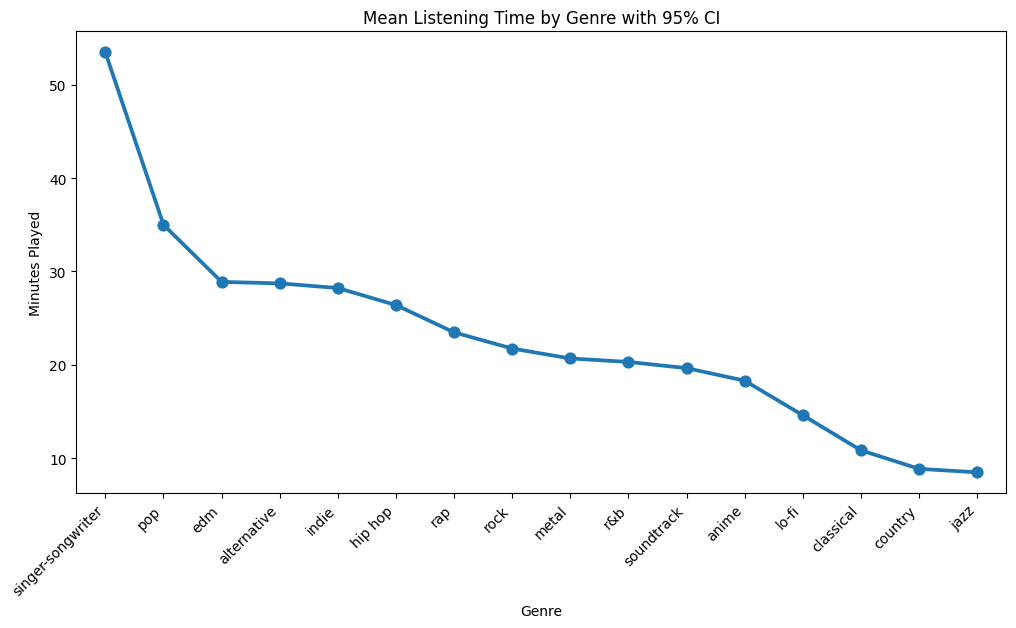

In [9]:
plt.figure(figsize=(12, 6))
sns.pointplot(data=df_genre_mean_time, x='mapped_genre', y='minutesPlayed',
              ci=95, capsize=0.2)
plt.xticks(rotation=45, ha='right')
plt.title('Mean Listening Time by Genre with 95% CI')
plt.xlabel('Genre')
plt.ylabel('Minutes Played')

Now that we have looked at the relationship with the genre and listening time, we can shift to analysis other relationships. Let's start with the energy comparison between the dance pop and album rock genres.

HO = Dance Pop and Album Rock have the same energy levels

HA = Dance Pop and Album Rock have different energy levels.

In [10]:
# Convert relevant columns to numeric
df['duration_ms'] = pd.to_numeric(df['duration_ms'], errors='coerce')
df['time_signature'] = pd.to_numeric(df['time_signature'], errors='coerce')
df['key'] = pd.to_numeric(df['key'], errors='coerce')

In [11]:
# Keep only relevant columns and drop rows with missing values
relevant_columns = ['trackName', 'artistName', 'genre', 'msPlayed', 'danceability', 'energy',
                    'valence', 'duration_ms', 'tempo', 'speechiness']
df_clean = df[relevant_columns].dropna()

In [12]:
# Display summary statistics
print(df_clean.describe())
print("\nUnique Genres:\n", df_clean['genre'].unique())

           msPlayed  danceability       energy      valence   duration_ms  \
count  8.524000e+03   8524.000000  8524.000000  8524.000000  8.524000e+03   
mean   1.546010e+06      0.601745     0.566079     0.435372  2.038258e+05   
std    5.575535e+06      0.158431     0.241490     0.242841  7.347258e+04   
min    8.000000e+01      0.000000     0.001080     0.000000  1.002700e+04   
25%    1.417410e+05      0.508000     0.407000     0.238000  1.629540e+05   
50%    2.732415e+05      0.622500     0.591000     0.409500  1.958800e+05   
75%    1.224504e+06      0.714000     0.752000     0.618000  2.310020e+05   
max    1.583671e+08      0.976000     0.999000     0.986000  1.847210e+06   

             tempo  speechiness  
count  8524.000000  8524.000000  
mean    119.110969     0.077917  
std      28.979390     0.077307  
min       0.000000     0.000000  
25%      97.115000     0.036100  
50%     118.899000     0.047800  
75%     139.440000     0.081100  
max     236.196000     0.777000  


T-test result: p = 0.0556


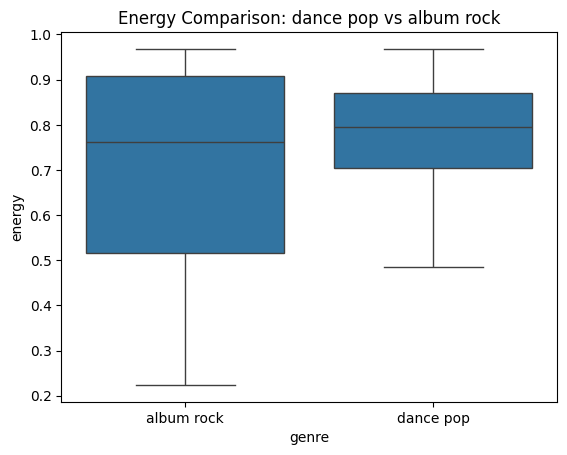

In [13]:
from scipy.stats import ttest_ind

genre1 = 'dance pop'
genre2 = 'album rock'
group1 = df_clean[df_clean['genre'] == genre1]['energy']
group2 = df_clean[df_clean['genre'] == genre2]['energy']

t_stat, p_val1 = ttest_ind(group1, group2, equal_var=False)
print(f"T-test result: p = {p_val1:.4f}")

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.boxplot(data=df_clean[df_clean['genre'].isin([genre1, genre2])], x='genre', y='energy')
plt.title(f'Energy Comparison: {genre1} vs {genre2}')
plt.show()

Since the p-value calculated is greater than alpha (0.5), this means that we fail to reject the null hypothesis (dance pop and album rock have the same energy level)

Now, changing from our previous focus on genres, we can also look at the correlation between our features. We will specifcally look at the correlation between the danceability and valence (the music positiveness conveyed).

HO = The danceability doesn't have an impact of the valence of the song.

HA = The danceability has an impact on the valence of the song.

Correlation: r = 0.49
Pearson Correlation: p = 0.00


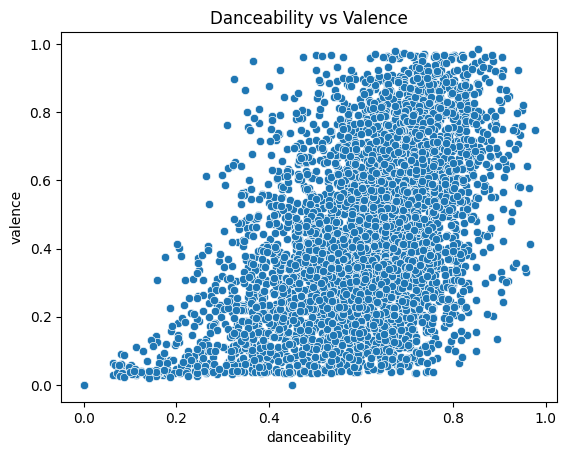

In [14]:
pearson_res = stats.pearsonr(df_clean['danceability'], df_clean['valence'])
pearson_pval = pearson_res.pvalue
corr_val = df_clean['danceability'].corr(df_clean['valence'])
print(f"Correlation: r = {corr_val:.2f}")
print(f"Pearson Correlation: p = {pearson_pval:.2f}")

# Plot
plt.figure()
sns.scatterplot(data=df_clean, x='danceability', y='valence')
plt.title('Danceability vs Valence')
plt.show()

Since the p-value is less than alpha (0.05), we reject the null hypothesis, telling us there is a correaltion between the danceability and the valence. We can also see this is a positive relationship through our calculated r.

Next, going back to the genre, we want to look at the relationship between the genree and play level. We will define a high play level if it is played more than the median time played, and low otherwise. With these two categories, we can perform a chi-squared test.

HO = The songs in the "High" play level and "Low" play level are the same

HA = The songs in the "High" play level and "Low" play level are different.

Chi-Squared-test result: p = 0.0000


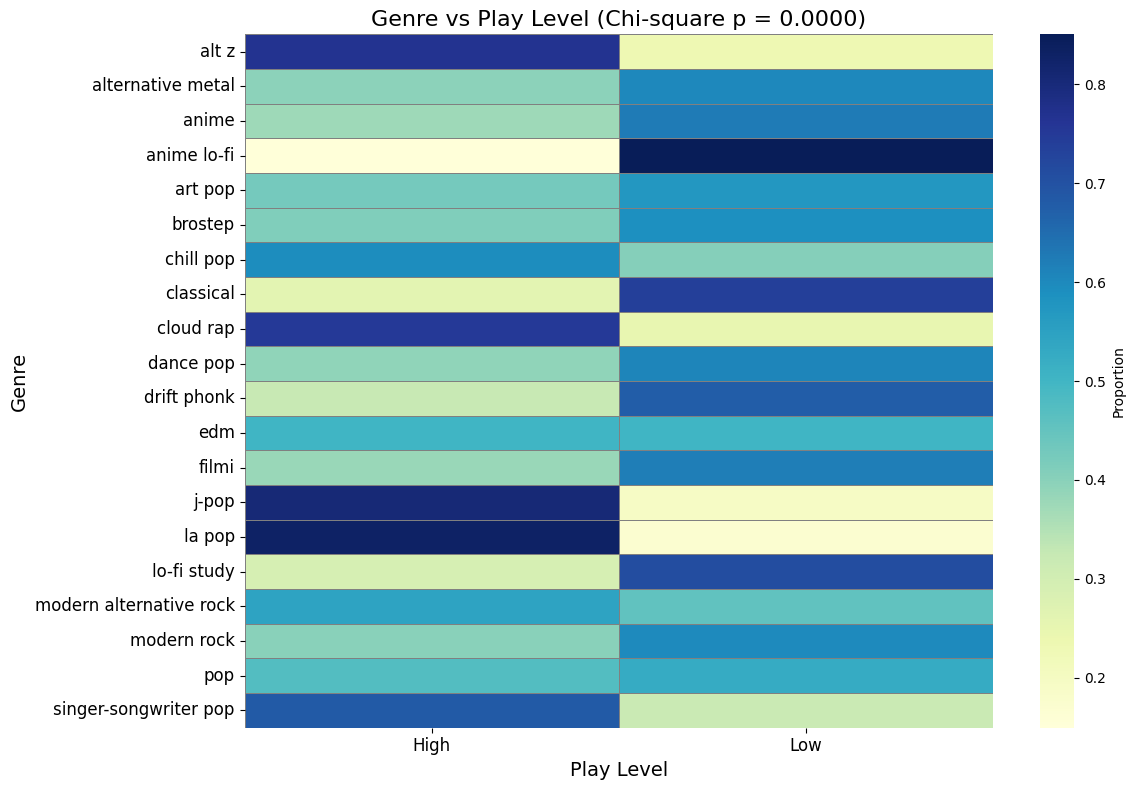

In [15]:
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Categorize play level
median_play = df_clean['msPlayed'].median()
df_clean['play_level'] = df_clean['msPlayed'].apply(lambda x: 'High' if x > median_play else 'Low')

# Keep top 20 genres
top_genres = df_clean['genre'].value_counts().head(20).index
filtered = df_clean[df_clean['genre'].isin(top_genres)]

# Contingency table and Chi-square test
genre_play = pd.crosstab(filtered['genre'], filtered['play_level'])
chi2_stat, p_val2, _, _ = chi2_contingency(genre_play)

# Normalize by row to show proportions
genre_play_norm = genre_play.div(genre_play.sum(axis=1), axis=0)
print(f"Chi-Squared-test result: p = {p_val2:.4f}")

# Plot heatmap (proportional values)
plt.figure(figsize=(12, 8))
sns.heatmap(genre_play_norm, cmap='YlGnBu', linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Proportion'})
plt.title(f'Genre vs Play Level (Chi-square p = {p_val2:.4f})', fontsize=16)
plt.xlabel('Play Level', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()

Notice since the p-value is less than alpha (0.5), we reject the null hypothesis, telling us there is a difference between the high and low played songs.

To summarize the last three conclusions,

In [16]:
print("Conclusions:")
print(f"T-test (energy): p = {p_val1:.4f} → {'Significant' if p_val1 < 0.05 else 'Not significant'} energy difference between {genre1} and {genre2}.")
print(f"Correlation (danceability vs valence): r = {corr_val:.2f} → {'Positive' if corr_val > 0 else 'Negative'} relationship.")
print(f"Chi-square (genre vs play level): p = {p_val2:.4f} → {'Significant' if p_val2 < 0.05 else 'Not significant'} relationship between genre and play level.")

Conclusions:
T-test (energy): p = 0.0556 → Not significant energy difference between dance pop and album rock.
Correlation (danceability vs valence): r = 0.49 → Positive relationship.
Chi-square (genre vs play level): p = 0.0000 → Significant relationship between genre and play level.


Finally, we will look at the mean song length and how it is distributed.

3.397


Text(0, 0.5, 'Count')

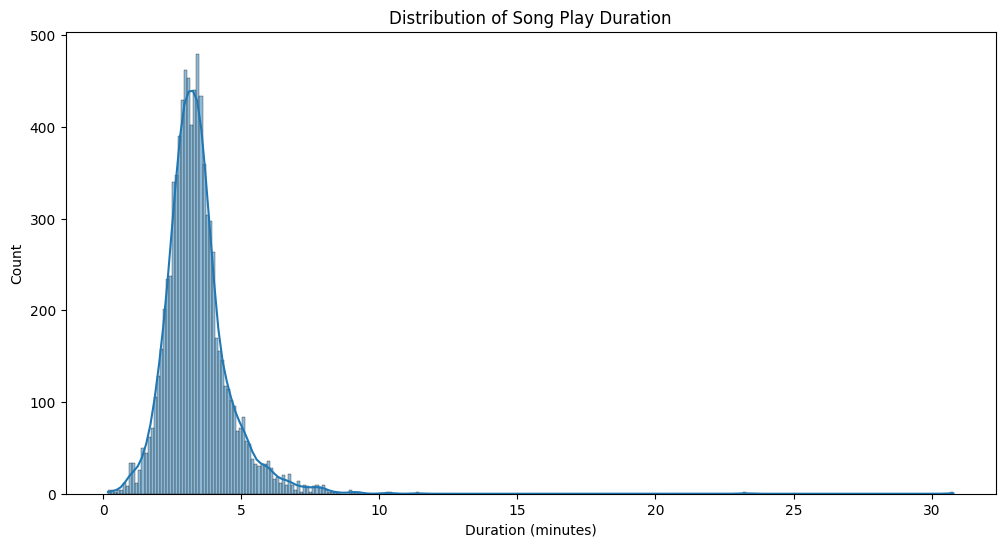

In [17]:
df_mean_duration = df_clean.copy()
df_mean_duration['duration_ms'] = df_mean_duration['duration_ms'].astype(float)/60000 # Convert to minutes
df_mean_duration['duration_ms'] = df_mean_duration['duration_ms'].astype(float).round(2)  # Round to 2 decimal places
print(df_mean_duration['duration_ms'].mean().round(3)) # Display mean duration in minutes

plt.figure(figsize=(12, 6))
sns.histplot(data=df_mean_duration['duration_ms'], kde=True)
plt.title('Distribution of Song Play Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')

From this graph we can see that the song duration column has a normal distribution with a mean of ~3.4 minutes.

### **Primary Analysis (Machine Learning)**

Now that we have got a better understanding of our data and it's relationships, we can shift towards training a machine learning model to classify songs. Notice by the nature of our problem, we will be looking to create a classification model. For this, we want to be able to personalize a model for each user so we will collect our labels by randomly choosing songs from the dataset, asking the user if they know the dataset or not (labels are as follows: like - 1, dislike - 0, don't know - skip). This will then allow us to train the model specfic to the user. (Note: we already have created labels in for the dataset based on our preference).

Due to the nature of the problem (classificaiton), we will perform the following four Machine Learning Algorithms: K-Nearest Neighbors, Decision Trees, Random Forest, and Logistic Regression. We also want to focus on comparing the power of different models.

In [18]:
#IMPORTS FOR MODELS AND ANALYSIS
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

To start, we need to perform feature engineering for the training of our machine learning model. This includes **standardizing** our current features, and performing **One Hot Encoding** on the "mapped_genre" column to convert the data into interpretable binary data for the model.

In [19]:
#Temporary Dataset:
classifying_columns = ['msPlayed', 'danceability', 'energy', 'key', 'loudness', 'mode',
                    'valence', 'duration_ms', 'tempo', 'speechiness', 'instrumentalness', 'acousticness', 'liveness']


#Step 1: Standardize the Data
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(df[classifying_columns]), columns = classifying_columns) #Change X to be our actual data
print(df.shape, df_genre.shape)

# #Perform One Hot Encoding on the genres
df_temp = df_genre
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df_genre[['mapped_genre']])
X_encoded = pd.DataFrame(encoded, columns=encoder.categories_[0])
df_final = df_temp.drop(['genre', 'mapped_genre'], axis=1)
print(X_std.shape, X_encoded.shape)
df_final = pd.concat([X_std, X_encoded], axis=1)
df_final = pd.concat([df_final.reset_index(drop=True), df_genre['user_label'].reset_index(drop=True)], axis=1)

X = df_final.drop(['user_label'], axis = 1)
Y = df_final['user_label']

display(X)
display(Y)

(8524, 24) (8524, 24)
(8524, 13) (8524, 17)


,msPlayed,danceability,energy,key,loudness,mode,valence,duration_ms,tempo,speechiness,...,jazz,lo-fi,metal,other,pop,r&b,rap,rock,singer-songwriter,soundtrack
0,0.046675,-0.800047,-1.805890,0.491038,-1.713730,0.787348,-1.290515,-0.721384,-0.237078,-0.348200,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.251183,0.563398,1.026691,-1.187457,0.900389,-1.270087,0.303211,-0.792380,0.445206,0.505591,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.272806,0.140478,0.123909,-0.348210,-0.228499,0.787348,1.896937,-1.556003,0.064119,-0.601750,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.710097,0.146790,0.662265,1.610035,-0.528360,-1.270087,0.294975,1.042276,0.201328,-0.433579,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.124114,0.273035,0.186027,0.770787,0.499386,-1.270087,0.863280,-0.807938,1.323916,0.764315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,0.668369,0.904260,-0.368893,1.610035,0.165186,-1.270087,0.076712,0.251730,0.584727,0.130440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8520,-0.157399,-0.408688,-1.752054,-0.907708,-1.577310,0.787348,-0.783982,0.258631,0.414354,-0.579759,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8521,-0.259795,-2.018311,-1.689936,0.211289,0.150737,0.787348,-0.771628,-1.241949,-1.862087,-0.605631,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8522,-0.100048,0.190976,-1.168145,1.050536,-1.020559,-1.270087,-0.936354,0.572644,0.363419,0.028244,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


0       0
1       0
2       0
3       0
4       0
       ..
8519    0
8520    0
8521    0
8522    0
8523   -1
Name: user_label, Length: 8524, dtype: int64

**Principal Component Analysis (PCA):** For our classification, we don't care about preserving information about the features and we don't want to remove any feature completely when performing reduction. Due to this, we want to apply PCA to our model.

Cumulative Variance by Components:
           0
0   0.245766
1   0.343774
2   0.429105
3   0.508613
4   0.580881
5   0.650120
6   0.714381
7   0.772927
8   0.826130
9   0.876485
10  0.911820
11  0.934232
12  0.951172
13  0.962264
14  0.971848
15  0.977954
16  0.981062
17  0.983948
18  0.986728
19  0.989123
20  0.991219
21  0.993242
22  0.995142
23  0.996941
24  0.998190
25  0.999290
26  0.999588
27  0.999843
28  1.000000
29  1.000000


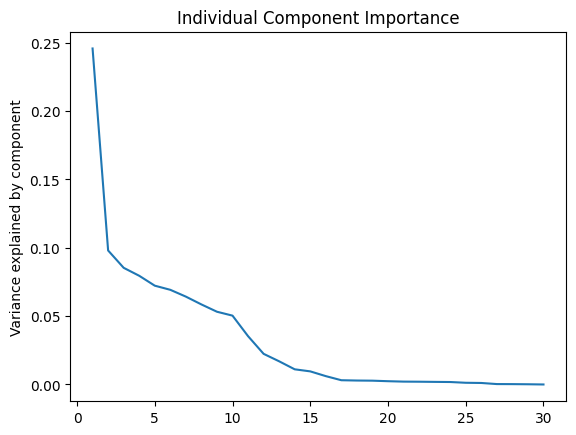

In [20]:
#Step 2: Applying PCA
pca = PCA()
X_pca = pca.fit_transform(X)
variance_exp = pca.explained_variance_ratio_

plt.plot(range(1, len(variance_exp) + 1), variance_exp)
plt.ylabel('Variance explained by component')
plt.title('Individual Component Importance')

print("Cumulative Variance by Components:")
print(pd.DataFrame(np.cumsum(variance_exp)))
#Need to check the optimal amount of features and then remove that amount

Notice that with 13 features (the table above is 0-indexed) we can account for 95% of the variance in the data, thus we can truncate to only look at the 14 most important principal components.

In [ ]:
#Keeping only the first 13 features
k = 13
X_imp = pd.DataFrame(X_pca[:, :k])
X_names = df_genre[['trackName', 'artistName']]

#Add the corresponding trackname and artist_name to the songs.
X_class = pd.concat([X_names.reset_index(drop=True), X_imp.reset_index(drop=True)], axis=1)
classification_data = pd.concat([X_class.reset_index(drop=True), Y.reset_index(drop=True)], axis=1)
display(classification_data)

#Notice that when the liked value is 0, the individual doesn't know the song.
#This suggest we can use them later for the recommendation process.
classification_rec = classification_data[classification_data['user_label'] == 0]
classification_train = classification_data[classification_data['user_label'] != 0]
display(classification_rec)
display(classification_train)

#Organizing the data from training and testing the model
Y_classification = classification_train['user_label']
X_classification = classification_train.drop(['trackName', 'artistName', 'user_label'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X_classification, Y_classification, test_size=0.2)

,trackName,artistName,0,1,2,3,4,5,6,7,8,9,10,11,12,user_label
0,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,-4.120085,-0.510193,-0.045379,-0.225527,0.328766,-0.361777,0.564668,-0.444189,0.161456,1.263169,0.175932,0.569428,-0.270905,0
1,#BrooklynBloodPop!,SyKo,2.032040,-0.715536,-0.727578,-1.255466,-0.267301,0.507245,-1.155419,-0.915580,-0.143444,-0.771107,0.091696,0.083876,-0.565250,0
2,$10,Good Morning,0.180141,-1.336879,1.484295,0.230456,-0.171433,-0.339902,0.695585,-1.053716,0.198599,-0.089657,-1.391609,-0.037776,0.571286,0
3,(I Just) Died In Your Arms,Cutting Crew,0.791279,0.767026,-1.410952,1.849614,0.152876,-0.913258,-0.095770,0.159844,0.205319,0.261614,-0.033459,-0.984309,-0.314035,0
4,(L)only Child,salem ilese,1.270776,-1.155356,-1.222622,0.016317,0.993132,-0.619386,0.070778,-0.210264,-0.073819,-0.873135,-0.339739,-0.013981,-0.356986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,Younger,Ruel,0.653269,-0.366107,-1.275021,1.579303,0.693699,-0.708113,0.055357,0.262410,-0.073657,-0.332716,0.722314,-0.426353,-0.408886,0
8520,Younger with Time.,Ben Zaidi,-2.635121,0.331465,1.443830,-0.212528,0.505911,-0.180079,0.265026,0.577036,0.516269,-1.362354,0.336505,-0.270136,0.492399,0
8521,Your Love Is My Drug (8 Bit Slowed),just valery,-1.884518,0.210112,-0.440941,-1.074717,-0.899316,2.450070,1.385977,-0.483750,-1.553348,-0.583894,-0.692296,-0.248800,-0.028364,0
8522,Your Power,Billie Eilish,-1.654375,-0.280634,-1.317766,0.680105,0.425891,-0.065508,0.349338,0.922555,0.451503,-1.630756,0.847570,0.162502,0.625087,0


,trackName,artistName,0,1,2,3,4,5,6,7,8,9,10,11,12,user_label
0,"""In The Hall Of The Mountain King"" from Peer G...",London Symphony Orchestra,-4.120085,-0.510193,-0.045379,-0.225527,0.328766,-0.361777,0.564668,-0.444189,0.161456,1.263169,0.175932,0.569428,-0.270905,0
1,#BrooklynBloodPop!,SyKo,2.032040,-0.715536,-0.727578,-1.255466,-0.267301,0.507245,-1.155419,-0.915580,-0.143444,-0.771107,0.091696,0.083876,-0.565250,0
2,$10,Good Morning,0.180141,-1.336879,1.484295,0.230456,-0.171433,-0.339902,0.695585,-1.053716,0.198599,-0.089657,-1.391609,-0.037776,0.571286,0
3,(I Just) Died In Your Arms,Cutting Crew,0.791279,0.767026,-1.410952,1.849614,0.152876,-0.913258,-0.095770,0.159844,0.205319,0.261614,-0.033459,-0.984309,-0.314035,0
4,(L)only Child,salem ilese,1.270776,-1.155356,-1.222622,0.016317,0.993132,-0.619386,0.070778,-0.210264,-0.073819,-0.873135,-0.339739,-0.013981,-0.356986,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,Younger,Jonas Blue,2.055294,-0.466441,1.785111,0.901715,-0.431175,0.089278,-0.076434,-0.256611,0.424692,0.342336,-0.643119,0.493948,0.592453,0
8519,Younger,Ruel,0.653269,-0.366107,-1.275021,1.579303,0.693699,-0.708113,0.055357,0.262410,-0.073657,-0.332716,0.722314,-0.426353,-0.408886,0
8520,Younger with Time.,Ben Zaidi,-2.635121,0.331465,1.443830,-0.212528,0.505911,-0.180079,0.265026,0.577036,0.516269,-1.362354,0.336505,-0.270136,0.492399,0
8521,Your Love Is My Drug (8 Bit Slowed),just valery,-1.884518,0.210112,-0.440941,-1.074717,-0.899316,2.450070,1.385977,-0.483750,-1.553348,-0.583894,-0.692296,-0.248800,-0.028364,0


,trackName,artistName,0,1,2,3,4,5,6,7,8,9,10,11,12,user_label
6,"...And to Those I Love, Thanks for Sticking Ar...",$uicideboy$,0.188987,0.020657,1.294902,-0.359089,-0.483996,0.021998,-0.337061,-0.262820,-0.939344,0.000129,1.741033,-0.337879,-0.321654,-1
24,2021,Lauv,-0.158724,-0.465624,2.080125,0.048996,-0.327494,0.164572,-0.471520,0.156584,0.240698,-0.678886,1.183205,0.616988,0.558504,1
32,26,Lauv,-0.191163,-0.715867,0.609294,-0.511253,1.266291,-0.346562,1.253686,-0.024508,0.345966,-1.117779,0.173526,0.570881,0.630378,1
37,2AM,SZA,-0.709675,-1.616935,-1.789130,-0.091337,0.855791,0.741509,-1.055082,3.870507,-0.330053,0.392167,-0.761449,-0.920688,0.783737,-1
39,2step,Ed Sheeran,1.177130,-0.815910,0.143808,1.364108,-0.578092,0.204507,-1.183583,-0.572031,-0.411435,-0.434315,-0.211639,-0.124167,0.534593,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8463,Wrapped Around Your Finger,Post Malone,1.340457,0.001131,0.909092,-0.650933,-0.513913,0.775003,0.275530,-0.902263,0.222864,-0.251285,0.673116,-0.432264,-0.202653,-1
8474,YN,KLOUD,0.448727,2.190004,-0.409217,-0.303549,0.339872,-1.012968,0.887121,0.267797,-1.576884,0.597682,0.266356,-0.070927,-0.188738,-1
8499,You Deserve Better,James Arthur,1.593772,-2.084519,-1.501189,-0.935727,1.156728,0.597280,-1.789020,3.557096,-0.386641,0.956198,-1.642063,-0.809421,0.888887,-1
8516,Youngblood,5 Seconds of Summer,1.786050,-1.281496,-2.041604,-1.332387,1.460257,-0.039565,-1.978788,3.232135,-1.399325,1.394038,0.053456,0.137804,-0.462639,-1


### Stratified K_fold
We want to be able to confirm the accuracy of the model both in the training and testing phases

In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

### K-Nearest Neigbours

In [ ]:
np.random.seed(42)
knn_model = KNeighborsClassifier(n_neighbors = 5)

score = cross_val_score(knn_model, X_train, y_train, cv=skf)
print(f"Name: KNN, Cross Validation Mean: {score.mean()}, Cross Validation Standard Deviation: {score.std()} ")

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
compared_knn = y_pred_knn == y_test
accuracy_knn = np.sum(compared_knn)/y_pred_knn.shape[0]

print(f"Accuracy of KNN: {accuracy_knn:.3f}")
print(classification_report(y_test, y_pred_knn))

Name: KNN, Cross Validation Mean: 0.835134168157424, Cross Validation Standard Deviation: 0.02859448535629275 
Accuracy of KNN: 0.853
              precision    recall  f1-score   support

          -1       0.87      0.91      0.89       106
           1       0.81      0.75      0.78        57

    accuracy                           0.85       163
   macro avg       0.84      0.83      0.84       163
weighted avg       0.85      0.85      0.85       163



### Decision Tree

In [ ]:
np.random.seed(42)
decision_tree_model = DecisionTreeClassifier()

score = cross_val_score(decision_tree_model, X_train, y_train, cv=skf)
print(f"Name: Decision Tree, Cross Validation Mean: {score.mean()}, Cross Validation Standard Deviation: {score.std()} ")

decision_tree_model.fit(X_train, y_train)

y_pred_dtree = decision_tree_model.predict(X_test)
compared_dtree = y_pred_dtree == y_test
accuracy_dtree = np.sum(compared_dtree)/y_pred_dtree.shape[0]

print(f"Accuracy of Decision Tree: {accuracy_dtree:.3f}")
print(classification_report(y_test, y_pred_dtree))

Name: Decision Tree, Cross Validation Mean: 0.9368038163387002, Cross Validation Standard Deviation: 0.033895746389828736 
Accuracy of Decision Tree: 0.988
              precision    recall  f1-score   support

          -1       0.98      1.00      0.99       106
           1       1.00      0.96      0.98        57

    accuracy                           0.99       163
   macro avg       0.99      0.98      0.99       163
weighted avg       0.99      0.99      0.99       163



### Random Forest

In [ ]:
np.random.seed(42)
rf_model = RandomForestClassifier()

score = cross_val_score(rf_model, X_train, y_train, cv=skf)
print(f"Name: Random Forest, Cross Validation Mean: {score.mean()}, Cross Validation Standard Deviation: {score.std()} ")

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
compared_rf = y_pred_rf == y_test
accuracy_rf = np.sum(compared_rf)/y_pred_rf.shape[0]

print(f"Accuracy of Random Forest Classifier: {accuracy_rf:.3f}")
print(classification_report(y_test, y_pred_rf))


Name: Random Forest, Cross Validation Mean: 0.9475968992248063, Cross Validation Standard Deviation: 0.023064590024275713 
Accuracy of Random Forest Classifier: 0.988
              precision    recall  f1-score   support

          -1       0.98      1.00      0.99       106
           1       1.00      0.96      0.98        57

    accuracy                           0.99       163
   macro avg       0.99      0.98      0.99       163
weighted avg       0.99      0.99      0.99       163



### Logistic Regression

In [ ]:
np.random.seed(42)
logistic_model = LogisticRegression(max_iter = 10000)

score = cross_val_score(logistic_model, X_train, y_train, cv=skf)
print(f"Name: Logistic Regression, Cross Validation Mean: {score.mean()}, Cross Validation Standard Deviation: {score.std()} ")
logistic_model.fit(X_train, y_train)

y_pred_log = logistic_model.predict(X_test)
compared_log = y_pred_log == y_test
accuracy_log = np.sum(compared_log)/y_pred_log.shape[0]

print(f"Accuracy of Random Forest Classifier: {accuracy_log:.3f}")
print(classification_report(y_test, y_pred_log))

Name: Logistic Regression, Cross Validation Mean: 0.8197734048896839, Cross Validation Standard Deviation: 0.04240146680158932 
Accuracy of Random Forest Classifier: 0.804
              precision    recall  f1-score   support

          -1       0.82      0.89      0.85       106
           1       0.76      0.65      0.70        57

    accuracy                           0.80       163
   macro avg       0.79      0.77      0.78       163
weighted avg       0.80      0.80      0.80       163



**Model Analysis**: Notice that the Decision Tree and Random Classifier perform the best on both cross-validation of the training data and on the test data.
While the K-Nearest Neighbors and Logistic Regression have accuracies of 0.853 and 0.804, the Decision Tree and Logistic Regression Models both have a signficantly higher accuracy of 0.988. This directly showcases better generalization for the later two models.

Note: this pattern also holds for the cross-validation mean and standard deviation, showcasing the respective models performance on other training data. Based on the cross-validation mean and standard deviation the models rank as follows...
1. Random Forest
2. Decision Tree
3. K-Nearest Neighbors
4. Logistic Regression

Now that we have completed our analysis and chosen our models, we will use these models to give recommendations on possible songs the user will like.

The following code gives n number of recommendations to the user based on their input of n. It also makes a list of the songs in checked and it determined would be a 'dislike'.

In [ ]:
def recommendations(num_recommendations, model):
    recommendations_like = []
    recommendations_dislike = []
    checked_indices = []
    while(len(recommendations_like) < num_recommendations):
        idx = np.random.choice(classification_rec.index, 1)
        # makes sure the same song isn't checked twice
        if idx not in checked_indices:
            #stores the index into a checked index tracker
            checked_indices.append(idx)
            row_entry = classification_rec.loc[idx]
            X_entry= row_entry.drop(['trackName', 'artistName', 'user_label'], axis = 1)
            entry_prediction = model.predict(X_entry)
            #adding the song into the correct category
            if 1 in entry_prediction:
                recommendations_like.append((row_entry[['trackName', 'artistName']].values)[0])
            elif -1 in entry_prediction:
                recommendations_dislike.append((row_entry[['trackName', 'artistName']].values)[0])

    #formatting the lists into a dataframe with song name and artist name
    recommendations_like = pd.DataFrame(recommendations_like, columns = ['Song Name', 'Artist Name'])
    recommendations_dislike = pd.DataFrame(recommendations_dislike, columns = ['Song Name', 'Artist Name'])

    #Prints out the song recommendations and songs to avoid
    print("Songs you make like:")
    print(recommendations_like)
    print(f"\n\n Songs you may dislike:")
    print(recommendations_dislike)


In [ ]:
print("Decision Tree Recommendations:\n")
recommendations(10, decision_tree_model)

Decision Tree Recommendations:

Songs you make like:
                     Song Name            Artist Name
0                     How Long           Charlie Puth
1                      What If  StreamBeats Originals
2                  Nobody Else               Low Roar
3               Shambhu Sutaya           Sachin-Jigar
4                  Hello World             Mark Ambor
5                        Bloom                 Aether
6                    CranMango                 WILLIS
7               Randy Dandy Oh            Sean Dagher
8                          TOY             Chromatics
9  Something To Remember Me By            The Horrors


 Songs you may dislike:
                                        Song Name       Artist Name
0          Pts.Of.Athrty - Jay Gordon Reanimation       Linkin Park
1  SugarCrash! (feat. Kim Petras & Curtis Waters)           ElyOtto
2                                      First Echo  Masakatsu Takagi
3              Hole In My Heart (with Livingston)   Lou

In [ ]:
print("Random Forest Recommendations:\n")
recommendations(10, rf_model)

Random Forest Recommendations:

Songs you make like:
                                 Song Name     Artist Name
0                                  Pasoori       Shae Gill
1  Come and Get Your Love - Single Version         Redbone
2                           Traffic Lights       Sara Kays
3                   queen of broken hearts       blackbear
4                From The Lake To The Land  Foreign Fields
5                                   Tum Ho   Mohit Chauhan
6                             in your arms            Saib
7                           Drunken Sailor     Sean Dagher
8                                Beautiful           Crush
9                       Little Bit of Love     Tom Grennan


 Songs you may dislike:
                                            Song Name        Artist Name
0                                  You Get Me So High  The Neighbourhood
1   fools (can't help falling in love) (slowed dow...             Foster
2                                      Shinunoga E-Wa

### **Final Visualization**

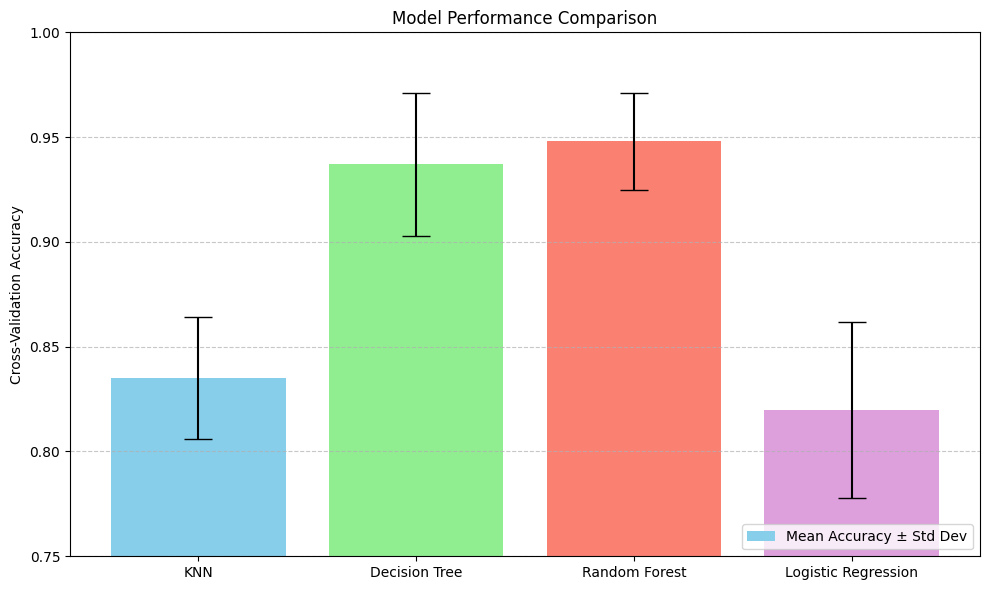

In [1]:
import matplotlib.pyplot as plt

# Cross-validation means and standard deviations
models = ['KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression']
means = [0.835, 0.937, 0.948, 0.820]
stds = [0.029, 0.034, 0.023, 0.042]

# Plotting
plt.figure(figsize=(10,6))
plt.bar(models, means, yerr=stds, capsize=10, color=['skyblue', 'lightgreen', 'salmon', 'plum'])
plt.ylabel('Cross-Validation Accuracy')
plt.ylim(0.75, 1.0)
plt.title('Model Performance Comparison')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(['Mean Accuracy ± Std Dev'], loc='lower right')
plt.tight_layout()
plt.show()


### **Visulization Analysis, Insights, and Conclusion**

Our project successfully demonstrated how user preference data can power a personalized music recommendation engine through data science and machine learning.

From our statistical analyses, we found:





*   Genre matters: Listening time varied significantly across genres (ANOVA p = 0.0002), and the chi-squared test confirmed that the likelihood of a song being highly played is genre-dependent.

*   Attribute relationships: Danceability and valence showed a moderate positive correlation (r = 0.49), indicating that upbeat songs tend to feel more positive.

*   No significant difference was found between the energy levels of 'dance pop' and 'album rock' songs.







From our machine learning evaluation, we observed:




*   Random Forest and Decision Tree models performed best, with ~0.99 accuracy and the highest cross-validation means.

*   KNN and Logistic Regression performed acceptably but with lower precision and more variance.

*   Our visualization confirmed that Random Forest had the best balance of accuracy and consistency across folds.

Overall, we built a working recommendation system that not only predicts user preferences accurately but also explains the underlying patterns in musical behavior. The system can scale to any user, enabling flexible, on-demand music discovery.

**Question: After reading through the project, does an uninformed reader feel informed about the topic? Would a reader who already knew about the topic feel like they learned more about it?**

**Answer:** Through this project, both informed and uninformed readers can learn about the process of machine learning and creating a recommendation system. For the uninformed readers, the project is detailed with clear steps, allowing them to follow along, learning the machine learning workflow and how to implement it. For an informed Data Scientist, this project translates understanding into application. It teaches them how to apply the concepts to a recommendation system problem. This gives a deeper understanding of how the recommendations work of many softwares around us (Ex. Netflix, Spotify, Instagram, etc.), while demonstrating its implementation.